# Model Evaluation
You need to use cross validation to evaluate the performance of three different decision tree models



In [12]:
# load packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# load data
churn = pd.read_csv('customer-churn-simple.csv')
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   customer service calls  3333 non-null   int64  
 6   churn                   3333 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 159.6+ KB


In [3]:
# calculate the base line accuracy if predict all customers loyal
df = churn.copy()

In [5]:

c = df['churn'].value_counts()
print(c)
print(f'the customer loyal rate is {c[0]/c.sum():.1%}')

False    2850
True      483
Name: churn, dtype: int64
the customer loyal rate is 85.5%


## Data Preparation

In [6]:
# we only choose three numerical features with no data issues to train the model
# account length, total day minutes, customer service calls
X = df[['account length','total day minutes','customer service calls']]
y = df['churn']

In [7]:
# Split the data into a training set and a test set. 
# You need to use 30% of the data set as the test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
print(X_train.shape)
print(X_test.shape)

(2333, 3)
(1000, 3)


## Model Evaluation

In [9]:
# let's build three decision trees with different model parameters
# tree 1: criterion='entropy', max_depth=3
# tree 2: criterion='entropy', max_depth=6
# tree 3: criterion='gini', max_depth=6
from sklearn.tree import DecisionTreeClassifier

tree_clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
tree_clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=6)
tree_clf3 = DecisionTreeClassifier(criterion='gini', max_depth=6)

In [11]:
# calculate accuracy, precision, recall using 10-fold cross validation
# print out the scores for eacch tree as follows
from sklearn.model_selection import cross_val_score

# average accuracy score
tree_clf1_scores_accu = cross_val_score(tree_clf1, X_train, y_train, scoring="accuracy", cv=10)
tree_clf2_scores_accu = cross_val_score(tree_clf2, X_train, y_train, scoring="accuracy", cv=10)
tree_clf3_scores_accu = cross_val_score(tree_clf3, X_train, y_train, scoring="accuracy", cv=10)

print('Average Accuracy Scores for each model:')
print(f'Tree 1 Average Accuracy Score: {tree_clf1_scores_accu.mean()}')
print(f'Tree 2 Average Accuracy Score: {tree_clf2_scores_accu.mean()}')
print(f'Tree 3 Average Accuracy Score: {tree_clf3_scores_accu.mean()}')

# average precision score
tree_clf1_scores_prec = cross_val_score(tree_clf1, X_train, y_train, scoring="precision", cv=10)
tree_clf2_scores_prec = cross_val_score(tree_clf2, X_train, y_train, scoring="precision", cv=10)
tree_clf3_scores_prec = cross_val_score(tree_clf3, X_train, y_train, scoring="precision", cv=10)

print('Average Precision Scores for each model:')
print(f'Tree 1 Average Precision Score: {tree_clf1_scores_prec.mean()}')
print(f'Tree 2 Average Precision Score: {tree_clf2_scores_prec.mean()}')
print(f'Tree 3 Average Precision Score: {tree_clf3_scores_prec.mean()}')

# average recall score
tree_clf1_scores_rec = cross_val_score(tree_clf1, X_train, y_train, scoring="recall", cv=10)
tree_clf2_scores_rec = cross_val_score(tree_clf2, X_train, y_train, scoring="recall", cv=10)
tree_clf3_scores_rec = cross_val_score(tree_clf3, X_train, y_train, scoring="recall", cv=10)

print('Average Recall Scores for each model:')
print(f'Tree 1 Average Recall Score: {tree_clf1_scores_rec.mean()}')
print(f'Tree 2 Average Recall Score: {tree_clf2_scores_rec.mean()}')
print(f'Tree 3 Average Recall Score: {tree_clf3_scores_rec.mean()}')

Average Accuracy Scores for each model:
Tree 1 Average Accuracy Score: 0.8902828216132935
Tree 2 Average Accuracy Score: 0.8808279226734161
Tree 3 Average Accuracy Score: 0.8808334250394336
Average Precision Scores for each model:
Tree 1 Average Precision Score: 0.7850227713463008
Tree 2 Average Precision Score: 0.703246214569744
Tree 3 Average Precision Score: 0.6704475962633858
Average Recall Scores for each model:
Tree 1 Average Recall Score: 0.34411764705882353
Tree 2 Average Recall Score: 0.3382352941176471
Tree 3 Average Recall Score: 0.3588235294117647


tree 1 scores:
Average Acuracy Score: 0.8902828216132935
Average Precision Score: 0.8902828216132935
Average Recall Score: 0.34411764705882353
tree 2 scores:
Average Acuracy Score: 0.8804005722460657
Average Precision Score: 0.8804005722460657
Average Recall Score: 0.3382352941176471
tree 3 scores:
Average Acuracy Score: 0.8808334250394336
Average Precision Score: 0.8808334250394336
Average Recall Score: 0.3588235294117647


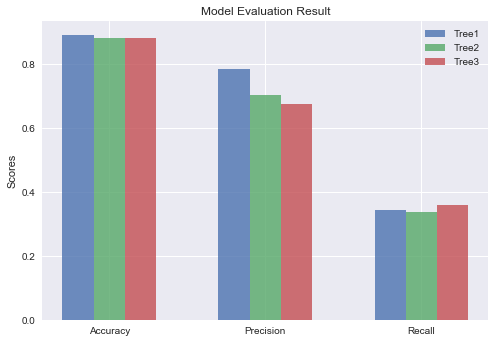

In [20]:
# Visualize via a grouped bar chart as shown below
# https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
# include all metrics in the scoring
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

score_params = {
    'accuracy' : make_scorer(accuracy_score), 
    'precision' : make_scorer(precision_score),
    'recall' : make_scorer(recall_score),
    }
    
def eval_model(model, train, test, score_params, fold):
    model_scores = cross_validate(model, train, test, scoring=score_params, cv=fold)
    a_mean = model_scores['test_accuracy'].mean() # Average Acuracy Score 
    p_mean = model_scores['test_precision'].mean() # Average Precision Score
    r_mean = model_scores['test_recall'].mean() # Average Recall Score
    print(f'Average Acuracy Score: {a_mean}')
    print(f'Average Precision Score: {a_mean}')
    print(f'Average Recall Score: {r_mean}')
    return [a_mean, p_mean, r_mean]
    return [a_mean, p_mean, r_mean]

print("tree 1 scores:")
tree1_scores = eval_model(tree_clf1, X_train, y_train, score_params, 10)

print("tree 2 scores:")
tree2_scores = eval_model(tree_clf2, X_train, y_train, score_params, 10)

print("tree 3 scores:")
tree3_scores = eval_model(tree_clf3, X_train, y_train, score_params, 10)

# create the histogram
plt.style.use('seaborn') # use seaborn style in this plot.
labels = ['Accuracy','Precision','Recall']
label_loc = np.arange(len(labels)) # the label locations
bar_width = 0.2 # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(label_loc - bar_width, tree1_scores, bar_width, label='Tree1', alpha=0.8)
rects2 = ax.bar(label_loc, tree2_scores, bar_width, label='Tree2', alpha=0.8)
rects3 = ax.bar(label_loc + bar_width, tree3_scores, bar_width, label='Tree3', alpha=0.8)

ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Result')
ax.set_xticks(label_loc)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

## Final Model and Prediction

In [22]:
# choose the best model
# From the cross validation results abover, I know that tree 1 is the best among three models.
# retrain the final model using ALL training data
tree_clf1.fit(X_train, y_train)

# get the prediction results from the testing set
y_pred = tree_clf1.predict(X_test)

# calculate accuracy, precision, recall, f1-score
# Note: y_test is the ground truth for the tesing set
# we have similiar score for the testing set as the cross validation score - good
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(f'Accuracy Score : {accuracy_score(y_test,y_pred)}')
print(f'Precision Score : {precision_score(y_test,y_pred)}')
print(f'Recall Score : {recall_score(y_test,y_pred)}')
print(f'F1 Score : {f1_score(y_test,y_pred)}')

Accuracy Score : 0.884
Precision Score : 0.7547169811320755
Recall Score : 0.27972027972027974
F1 Score : 0.40816326530612246


Confusion Matrix: 
 [[ 40 103]
 [ 13 844]]


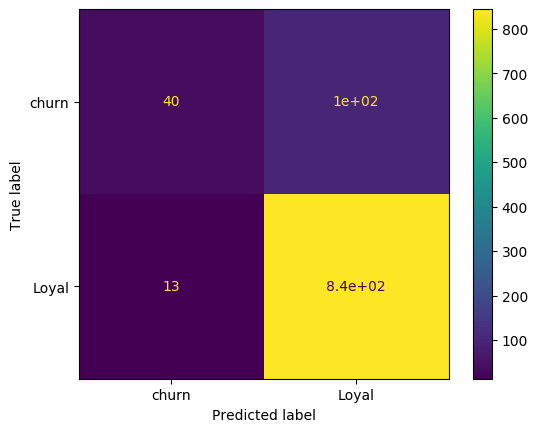

In [26]:
# plot the confusion matrix as show below
# you have to use the display labels with correct locations
plt.style.use('default') 
from sklearn.metrics import plot_confusion_matrix
class_names = ['churn', 'Loyal']
disp = plot_confusion_matrix(tree_clf1, X_test, y_test, labels=[1, 0], display_labels=class_names)
# disp.confusion_matrix returns confusion matrix as an array
print(f'Confusion Matrix: \n {disp.confusion_matrix}' )

In [36]:
# manually calculate the precision based on the confusion matrix above and check with the generated score
precision = disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0] + disp.confusion_matrix[1,0])
print(precision)

0.7547169811320755
